# Zeitreihendaten visualisieren, Teil II: matplotlib

Im ersten Teil haben wir die Aktienkurse von Meta mit `pandas` dargestellt. 

Die `pandas.DataFrame.plot()`-Methode baut auf einer umfassenden Visualisierungsbibliothek auf, `matplotlib`. Wollen wir Anpassungen über die eingebauten Funktionalitäten von `pandas.DataFrame.plot()` vornehmen, können wir beide Bibliotheken miteinander kombinieren. Wie das funktioniert, schauen wir uns in diesem zweiten Teil der Übung an. Denn hast du verstanden, wie die Bibliothek funktioniert, hast du alle Freiheiten, deine Visualisierung nach deinen Wünschen zu gestalten. 

-------------------------------------------------------------------------------------------------------------------------------

Wie du gesehen hast, bietet `pandas.DataFrame.plot()` bereits eine Menge von Funktionalitäten an. 
Was aber, wenn wir weitere Anpassungen vornehmen möchten? Beispielsweise könnten wir uns wünschen, die x-Achsenbeschriftung oder den Titel etwas größer zu gestalten. Oder wir möchten unserer Abbildung Text hinzufügen. Solche Änderungen nehmen wir am besten direkt in `matplotlib` vor. Dazu macht es Sinn, sich etwas mit der Funktionsweise der Bibliothek auseinanderzusetzen. 

Lies dir diesen Teil aufmerksam durch, das Wissen verschafft dir viel Freiheit im Umgang mit Visualisierungen, die unentbehrlicher Bestandteil der Arbeit eines Data Analyst sind. 

<div class="alert alert-block alert-warning">
<b>Praktisches:</b> Wir werden uns in diesem Abschnitt viel mit der matplotlib-Dokumentation auseinandersetzen. In der Praxis wirst du vermutlich eher auf Code-Beispiele im Internet zurückgreifen. Dennoch hilft dir das Wissen um die Funktionsweise dabei, Code einordnen zu können. Und solltest du tatsächlich mal nicht finden, was du suchst, kennst du Methoden, um danach zu suchen.  
</div>

Wie funktioniert `matplotlib`? Schauen wir uns zunächst den grundlegenden Aufbau an. 

Alle Visualisierungen in `matplotlib` verfügen über dieselben Grundzutaten: einer `figure`, die als Rahmen dient, und einer oder mehreren `Axes` (nicht zu verwechseln mit der Achse *axis*!), was nichts anderes ist als die tatsächlichen Bilder. 

<img src="data/figure_axes.png" alt="axes in matplotlib" width="400"/>

Zu einer `Axes` gehören verschiedene Elemente, wie Titel, die Achsen, die Linie oder die begrenzenden Umrandungen (*engl. Spines)* Diese wiederum haben weitere Attribute, beispielsweise hat der Titel eine Farbe, einen Zeichenabstand, möglicherweise eine Rotation, sowie eine x- und y-Position. 

Diese Graphik hier veranschaulicht die Zusammenhänge. Die verschiedenen Farben der Zirkel stellen die verschiedenen Ebenen dar, dazu gleich nochmal mehr. 

![Anatomie von matplotlib](data/anatomy.png)


Dies ist übrigens selbst eine mit `matplotlib` erzeugte Graphik. Den ursprünglichen, hier leicht abgewandelten, Code findest du [hier](https://matplotlib.org/stable/gallery/showcase/anatomy.html). (Du musst den Code jetzt aber noch nicht verstehen können!)

Was hilft uns dieses Wissen nun?
Nehmen wir doch noch einmal unseren Datensatz und erzeugen eine einfache Abbildung mit `pandas.DataFrame.plot()`. Vorher wandeln wir, wie schon in der vorigen Übung, die Spalte *Close/Last* noch in ein numerisches Format um. 
Weil wir wissen möchten, mit was wir es hier zu tun haben, weisen wir unserer Abbildung einen Namen zu, `ax`. Führe den Code in der Zelle aus. 

matplotlib.axes._subplots.AxesSubplot

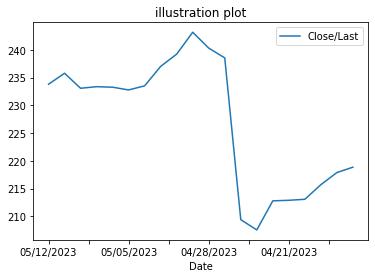

In [7]:
import pandas as pd

meta_df = pd.read_csv('meta_shares.csv')
meta_df.loc[:, 'Close/Last'] = meta_df.loc[:, 'Close/Last'].str.replace('$','', regex=False).astype('float')

ax = meta_df.plot(x='Date', y='Close/Last', title='illustration plot')
type(ax)

Wie wir sehen, handelt es sich hier um ein `AxesSubplot`-Objekt, das im Wesentlichen dasselbe ist wie ein `matplotlib.axes.Axes`-Objekt. Durch den Aufruf von `pandas.DataFrame.plot()`haben wir eine Instanz der `matplotlib`-Klasse `Axes` erschaffen.

Wo ist unsere `figure`?  
Darum hat sich die `pandas.DataFrame.plot()`-Methode selbständig gekümmert. Definieren wir nicht explizit eine `figure`-Instanz, so wird sie für uns kreiiert. Um sie müssen wir uns nicht mehr kümmern. Der folgende Code zeigt uns, dass sie tatsächlich existiert. Führe ihn aus.    

In [8]:
fig = ax.get_figure()
print(fig)

Figure(432x288)


Wie du vielleicht bemerkt hast, haben wir `fig` über unsere `matplotlib.axes.Axes`-Instanz `ax` aufgerufen. Faktisch ist - vielleicht etwas überraschend - `fig` auch ein Element von `ax`, und nicht andersherum. 

Schauen wir uns nun an, wie wir auf die einzelnen Elemente zugreifen können, und wichtiger - wie wir sie ändern können. 
Mithilfe von `ax.__dict__` (beachte die zwei Unterstriche) können wir uns sämtliche Attributwerte und -bezeichnungen unserer `ax` anzeigen lassen. Führe die folgende Zelle aus, und wirf einen Blick auf die Attribute. Am besten kommentierst du die Zelle anschließend aus, und lässt sie nochmal laufen, damit die Ausgabe nicht so viel Platz einnimmt.   

In [14]:
ax.__dict__

Wie du siehst hat unsere `ax` eine Menge Attribute, unter anderem eben unsere `fig`. 
Entsprechend der `matplotlib`-Anatomie-Abbildung oben sind auch `title`, `xaxis`, `yaxis`, `spines` und `lines` Beispiele für direkte Attribute unserer `ax`. In der Abbildung sind sie mit einem blauen Zirkel gekennzeichnet. Die violetten Zirkel wiederum sind Attribute der Attribute von `ax`.  

Möchtest du also beispielsweise `xlabel` finden, dann kannst du dir die Attribute von `xaxis` ausgeben lassen: 

In [15]:
ax.xaxis.__dict__

Unsere X-Achsenbeschriftung scheint hier die Bezeichnung `label` zu haben. Nun schauen wir uns auch noch den Typ an:  

In [18]:
print(ax.xaxis.label)
type(ax.xaxis.label)

Text(0.5, 17.200000000000003, 'Date')


matplotlib.text.Text

Das `ax.xaxis`-Attribut `label` ist ein `matplotlib.text.Text`-Objekt, welches mit dem String `'Date'` belegt ist. Die Werte `0.5` und `17.2` beziehen sich auf die x- und y-Positionen des Titels. Was wir sehen, ist lediglich eine Repräsentation dieses `Text`-Objekts. Der Titel zeichnet sich in Wirklichkeit durch weitaus mehr Attribute aus. 

**Aufgabe:** Bemühe noch einmal `__dict__`, diesmal um dir die Attribute des Attributs `label` des `ax`-Attributs `xaxis` anzeigen zu lassen. 

Wie du siehst, ist das `label`-Attribut `_color` z.B. mit `'black'` belegt. Die Schriftgröße (`fontsize`) findet sich wiederum in `_fontproperties`, einem weiteren `matplotlib`-Objekt. 

**Aufgabe:** Wenn du möchtest, kannst du dir die `_fontproperties` hier auch noch einmal anschauen. 

Um ein Attribut unseres `ax.xaxis.label` zu ändern, könnten wir nun theoretisch dieses Attribut direkt überschreiben. Das machen wir, indem wir ihm den neuen Wert zuordnen: 

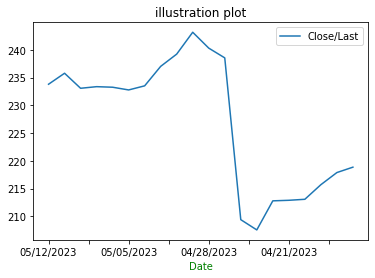

In [21]:
ax = meta_df.plot(x='Date', y='Close/Last', title='illustration plot')
ax.xaxis.label._color='green'

Das ist allerdings nicht *Good Practice*, und insbesondere der Unterstrich in `_color` signalisiert uns, dass ein direkter Zugriff auf das Attribut von den Entwicklern explizit nicht gewünscht wird. Auf den verschiedenen Ebenen finden wir aber Methoden, die es uns erlauben, Einfluss auf die Attribute zu nehmen. Das sind so genannte *Setter*-Methoden. Viele, aber nicht alle, beginnen mit `set_`.

Praktischerweise müssen wir oft gar nicht lange in den verschiedenen Ebenen suchen, denn die Entwickler von `matplotlib` haben viele Methoden bereits auf der obersten Ebene, in der `Axes`-Klasse, implementiert. Du kannst sie direkt auf deine `ax` anwenden. [Hier](https://matplotlib.org/stable/api/axes_api.html) findest du eine Übersicht dieser Methoden. Schau sie dir doch mal an, um einen Eindruck zu gewinnen.   

Schauen wir uns also an, wie wir also die Farbe der X-Achsenbeschriftung im Sinne der Entwickler festlegen können. Unter der Überschrift *Axis labels, title, and legend* finden wir eine Methode, die hier hilfreich sein könnte: `matplotlib.axes.Axes.set_xlabel()`.
Klicken wir hierauf, gelangen wir zu der entsprechenden [Dokumentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html). Wie du siehst, hat unser `ax.xaxis.label` noch mehr Parameter als lediglich Inhalt des Texts und x- und y-Position. 

**Aufgabe:** Ändere nun die Farbe der x-Achsenbeschriftung. Benenne es ausserdem in 'ILLUSTRATION DATE' um und ändere `fontsize` zu 15. Lass dich nicht davon verwirren, dass die Variable `fontdict` ein Dictionary ist, du kannst den Parameter direkt zuordnen. Ändere außerdem die Textfarbe zu grün, und rotiere den Titel um 10 Grad. Einen Hinweis darauf, wie das funktioniert, findest du, wenn du in der Dokumentation unter `**kwargs` schaust. 


In [ ]:
ax = meta_df.plot(x='Date', y='Close/Last', title='illustration plot')
#dein Code hier

**Aufgabe:** Lass dir nun noch einmal die entsprechenden Attribute ausgeben. Welche Werte haben nun `_color`, `_text` und `_rotation`? Greife auch auf die `_fontproperties` zu, und schaue dir ihre Werte an. 

Oben haben wir gesehen, dass sich die Elemente eines `Axes`-Objekts auf verschiedenen Ebenen befinden. Ebenso finden sich die Methoden, mithilfe derer wir Attribute ändern können, theoretisch auf der jeweils übergeordneten Ebene. 
Obwohl viele Methoden bereits in `matplotlib.axes.Axes` umgesetzt sind, sollten wir auch die Methoden der Attribute selbst im Blick haben. Manchmal können wir nur so untergeordnete Attribute verändern. 
Manchmal finden sich dort aber auch vereinfachte Funktionalitäten. Beispielsweise hat `ax.xaxis` eine Methode `tick_top()`, die weitaus einfacher funktioniert als die uns zur Verfügung stehenden Axes-Methoden:

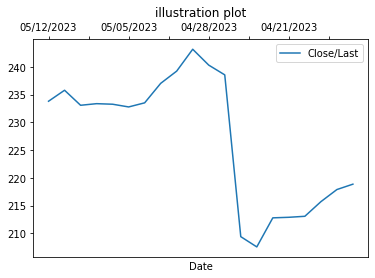

In [24]:
ax = meta_df.plot(x='Date', y='Close/Last', title='illustration plot')
ax.xaxis.tick_top()

Übrigens: möglicherweise hast du bei deinem Blick in die Übersicht der `Axes`-Methoden auch so genannte *Getter*-Methoden entdeckt. Mit ihrer Hilfe können wir einfach(er) und auch eleganter auf Attribute zugreifen. 
Ebenso wie die *Setter*-Methoden sind sie oft sowohl auf der obersten Ebene, als auch auf den unteren Ebenen verankert. 
Möchtest du dir beispielsweise den Text deiner X-Achsenbeschriftung anzeigen lassen, hast du zu `ax.xaxis.label._text` die folgenden Optionen:  

In [25]:
print(ax.xaxis.label.get_text())
print(ax.xaxis.get_label().get_text())
print(ax.get_xlabel())

Date
Date
Date


<div class="alert alert-block alert-warning"> <p><b>Praktisches</b>: Suchst du im Internet, beipielsweise auf StackOverflow, nach Lösungsansätzen für deine Visualisierung, wirst du sehr wahrscheinlich auf <b>matplotlib.pyplot</b>, gemeinhin mit dem Kürzel <b>plt</b> versehen, stossen. Die Methoden in dieser Bibliohtek sind in der Regel lediglich einfache Ummantelungen (wrapper) um die matplotlib-Methoden, und bieten an sich keine weitere Funktionalitäten an. matplotlib.pyplot wurde erschaffen, weil die Nutzung für eingefleischte Matlab-Nutzer intuitiver ist. </p>
    <p>In unserem vorangegangen Beispiel haben wir den Titel mit <b>ax.set_xlabel()</b> konfiguriert. Die Entsprechung in pyplot ist <b>plt.xlabel()</b>, die Keywords sind ganz genau dieselben. Die Bibliotheken lassen sich ohne Probleme mischen. </p>
<p>Für die Visualisierung ist matplotlib.pyplot also erlässlich. 
    Vermutlich hast du bei deinem Blick in die matplotlib-Dokumentation bemerkt, dass auch plot eine Axes-Methode ist. Im Gegensatz zu pandas.DataFrame.plot werden hier allerdings Figure und Axes nicht erschaffen. Die Linie wird auf einer bestehenden Axes erschaffen. Genau hierfür wird matplotlib.pyplot auch von matplotlib-Nutzern genutzt: mithilfe von <b>plt.subplots()</b> können Figure und Axes initialisiert werden. Im weiteren Verlauf des Kurses wirst du noch viele Beispiele hierfür kennenlernen.  </p> 
</div>

Wenden wir uns nun nochmal unserem schon etwas verschönerten `meta_df_date`-Plot vom ersten Teil zu und verbessern ihn weiter. Dazu müssen wir ihn zunächst nochmal herstellen. Führe hierzu die folgende Zelle aus. 

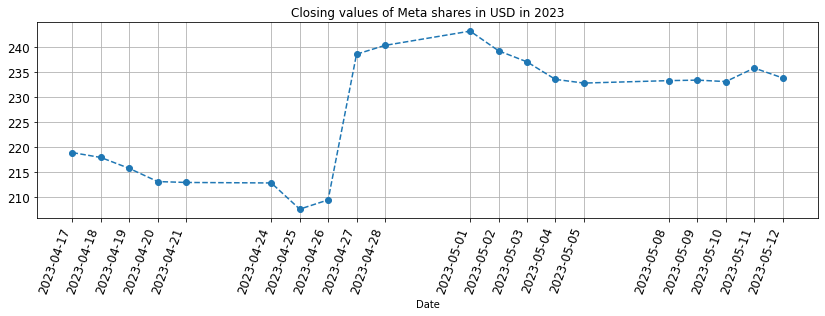

In [13]:
meta_df_date = meta_df.copy()
meta_df_date.loc[:, 'Date'] = pd.to_datetime(meta_df_date.Date)

t="Closing values of Meta shares in USD in 2023"
ax=meta_df_date.plot(x='Date', y='Close/Last', rot=70, legend=False, title=t, figsize=(14,4), xticks=meta_df_date.Date[::1], grid=True, style='--o', fontsize=12)



**Aufgabe:** Nutze dein erworbenes Wissen, um ihn noch weiter auszubauen. 
Zusätzlich zu den bereits implementierten Parametern solltest du folgendes tun: 
- Gib der Linie die Farbe 'mediumblue'.
- Füge eine y-Achsenbeschriftung 'USD' mit Schriftgröße 14 und Farbe 'mediumblue' hinzu. 
- Der Titel sollte ebenfalls in Farbe 'mediumblue' erscheinen und eine Schriftgröße von 16 haben. 
- Setze den Titel etwas ab, wähle ein Padding von 40.
- Entferne alle begrenzenden Umrandungen (*spines*). 
- Entferne die x-Achsenbeschriftung. 
- Füge der Abbildung auch einen Text an der Stelle mit dem höchsten y-Wert hinzu. Der Text sollte noch einmal den y-Wert darstellen (243.18 am 1. Mai). Um ihn etwas hervorzuheben, kannst du ihn mit Hintergrund 'mediumblue' und Schriftfarbe weiß versehen. Wähle eine Schriftgröße von 14. 

*[Hinweis: nutzt du für den Text `ax.text()`, dann setze am besten `transform=ax.transAxes`. So beziehen sich die x- und y-Koordinaten dann jeweils auf ein Koordinatensystem von `(0,0)` (rechts unten) bis `(1,1)` links oben.]*


Deine Abbildung sollte nun in etwa so aussehen: 

![grafik.png](data/viz_final.png)


Speichere sie nun noch unter dem Namen *meta_shares.png* ab. 
Das kannst du mit `fig.savefig()` tun. Greife dazu auf dein `figure`-Objekt am besten mit einer *Getter*-Methode zu, 
wie wir das weiter oben auch schon getan hatten. 

<div class="alert alert-block alert-info"> 
    <b>Herzlichen Glückwunsch.</b> Du hast dir nun ein breites Verständnis für die grundlegende Funktionsweise von `matplotlib` erarbeitet, und gesehen, wie `pandas.DataFrame.plot`mit `matplotlib` interagiert. 
  Du wirst im Laufe des Kurses noch weitere wichtige Elemente von matplotlib kennenlernen. Mit deinem jetzigen Wissen bist du aber bereits sehr gut aufgestellt. Die stehen zahlreiche Möglichkeiten zur Verfügung, deine Visualisierungen anzupassen.

**Merke**: 
- die `matplotlib.axes.Axes` Klasse hat eine Menge von Methoden zur Konfiguration deiner Visualisierung zu bieten. Eine Übersicht findest du [hier](https://matplotlib.org/stable/api/axes_api.html).

### Optionale Aufgabe: xticks 

Wenn du möchtest, kannst du diese optionale Aufgabe nutzen, um dich noch besser mit der Funktionsweise von `matplotlib` vertraut zu machen. Insbesondere kannst du hier Beispiele sehen, wie der direkte Zugriff auf Attribute durch *Getter*-Methoden ersetzt werden kann.  

Weiter oben hatten wir uns recht ausführlich mit dem `xticks`-Argument in `pandas.DataFrame.plot()` auseinandergesetzt. 
Hier schauen wir uns nochmal an, wie es hinter den Kulissen funktioniert. 


Zunächst definieren wir eine `ax2`, auf die wir unsere Übung beziehen: 

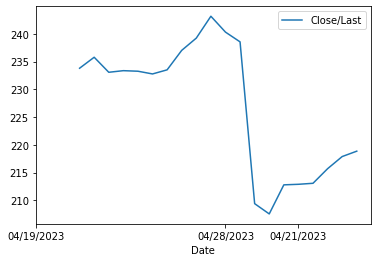

In [28]:
xt = [-3, 10, 15]
ax2 = meta_df.plot(y='Close/Last', x='Date', xticks=xt); 

**Aufgabe:** Finde nun in `matplotlib`: 
- die x- und y-Werte der Abbildung 
- den Array mit den Werten der *xticks*, also [-3, 10, 15]
- die Beschriftung (also den String) an Indexstelle 1, also '04/28/2023'. 

Wähle für alle drei Aufgaben zwei Wege: erstens den direkten Weg über die Attribute (wie beispielsweise `ax2.xaxis.label`), sowie den Weg über die in `matplotlib` eingebauten *Getter*-Methoden. Hinweis: einiger *Getter*-Methoden finden sich nicht auf der obersten Ebene, der *Axes*, sondern sind erst in den unteren Ebenen verbaut. Auf die nächstobere Ebene kannst du in der Regel auch mit einer *Getter*-Methode zugreifen.  

*[Hinweis: möglicherweise helfen dir die Methoden von [matplotlib-Text-Objekten](https://matplotlib.org/stable/api/text_api.html) und von [matplotlib-Line2D-Objekten](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) weiter.]*


In [1]:
#Lösung 

#x und y-Werte
#dein Code hier: Zugriff über Attribute
#dein Code hier: Zugriff über Getter-Methode

#Werte der xticks 
#dein Code hier: Zugriff über Attribute
#dein Code hier: Zugriff über Getter-Methode

#Beschriftung von Label1: '04/28/2023' 
#dein Code hier: Zugriff über Attribute
#dein Code hier: Zugriff über Getter-Methode 


Nun ändere noch die Beschriftung des Ticks an Indexposition 1 zu 'new'. Nutze dazu eine *Setter*-Methode. 

*[Hinweis: extrahiere dazu erst alle bestehenden Labels und überschreibe Indexstelle 1 anschließend]*

In [ ]:
ax2 = meta_df.plot(y='Close/Last', x='Date', xticks=xt)
#dein Code hier 

<div class="alert alert-block alert-info"> <b>Herzlichen Glückwunsch.</b> Du hast auf Attribute auf verschiedene Art zugegriffen und außerdem die xticks manipuliert.</div>